<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
PCA
</h1><center/>

**Link to the article** :  https://medium.com/@soulawalid/math-behind-pca-bb3d179cffbc?sk=38c6a9d042af469d69929d8537f7f082

<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Centering the Data
</h1><center/>

In [62]:
Scores = np.array([[85,80],[70,75],[90,85]])

In [64]:
Scores_df =pd.DataFrame(Scores, columns = ['Python','Math'])
Scores_df

,Python,Math
0,85,80
1,70,75
2,90,85


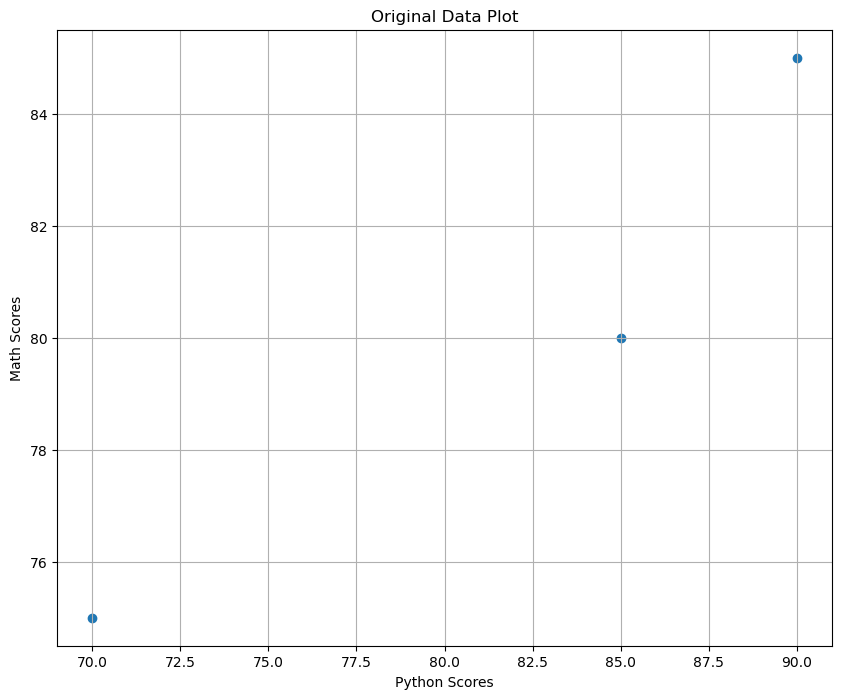

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(Scores_df['Python'],Scores_df['Math'])
plt.title('Original Data Plot')
plt.xlabel('Python Scores')
plt.ylabel('Math Scores')
plt.grid(True)
plt.show()

In [67]:
Scores

array([[85, 80],
       [70, 75],
       [90, 85]])

In [72]:
Scores.T

array([[85, 70, 90],
       [80, 75, 85]])

In [70]:
#Making data mean centric
mean_by_columns = np.mean(Scores.T,axis=1)
mean_by_columns

array([81.66666667, 80.        ])

In [71]:
#Scaled data
Scaled_Data = Scores - mean_by_columns
Scaled_Data

array([[  3.33333333,   0.        ],
       [-11.66666667,  -5.        ],
       [  8.33333333,   5.        ]])

In [73]:
cov_mat = np.cov(Scaled_Data.T)
cov_mat

array([[108.33333333,  50.        ],
       [ 50.        ,  25.        ]])

In [74]:
Eval, Evec = eig(cov_mat)
print('Eigenvalues :')
print(Eval)
print('Eigenvectors :')
print(Evec)

Eigenvalues :
[131.75208063   1.5812527 ]
Eigenvectors :
[[ 0.90558942 -0.4241554 ]
 [ 0.4241554   0.90558942]]


In [81]:
# Projection
projected_data = Evec.T.dot(Scaled_Data.T)
projected_data.T

array([[  3.0186314 ,  -1.41385132],
       [-12.6859869 ,   0.42053252],
       [  9.66735549,   0.9933188 ]])

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(Scores)

array([[  3.0186314 ,  -1.41385132],
       [-12.6859869 ,   0.42053252],
       [  9.66735549,   0.9933188 ]])

In [82]:
pca.components_

array([[ 0.90558942,  0.4241554 ],
       [-0.4241554 ,  0.90558942]])

In [83]:
pca.explained_variance_

array([131.75208063,   1.5812527 ])

---

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import eig

data = {
    'Student': ['Student 1', 'Student 2', 'Student 3'],
    'Python': [85, 70, 90],
    'Math': [80, 75, 85]
}

df = pd.DataFrame(data)
df

,Student,Python,Math
0,Student 1,85,80
1,Student 2,70,75
2,Student 3,90,85


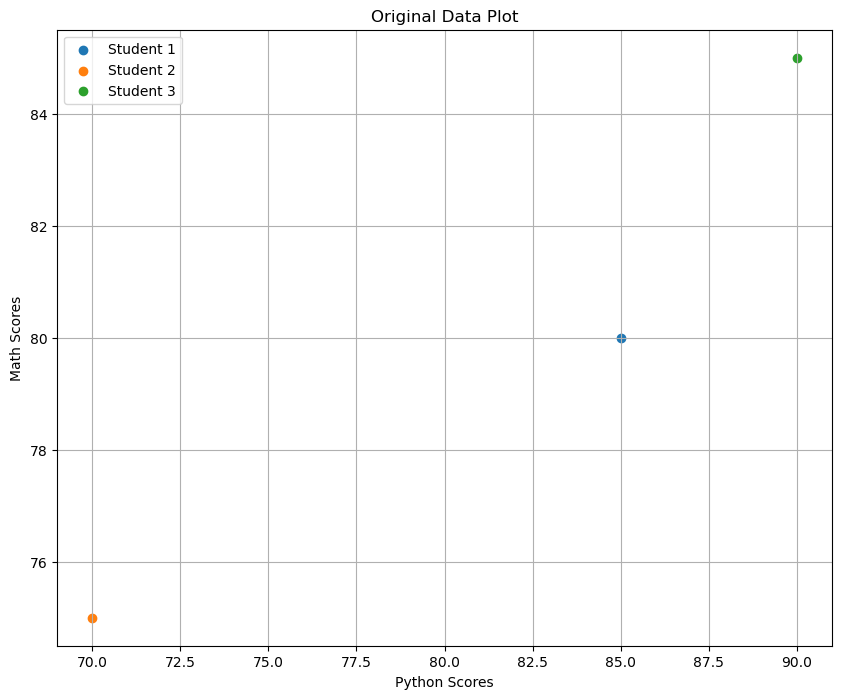

In [92]:
# Plotting the original data
plt.figure(figsize=(10, 8))

for i, student in enumerate(df['Student']):
    plt.scatter(df.loc[i, 'Python'], df.loc[i, 'Math'], label=student, marker='o')

plt.title('Original Data Plot')
plt.xlabel('Python Scores')
plt.ylabel('Math Scores')
plt.legend()
plt.grid(True)
plt.show()

In [93]:
# Calculate the mean of Python and Math scores
mean_python = df['Python'].mean()
mean_math = df['Math'].mean()

# Print the means
print(f"Mean Python score: {mean_python}")
print(f"Mean Math score: {mean_math}")

Mean Python score: 81.66666666666667
Mean Math score: 80.0


In [94]:
# Center the data by subtracting the mean from each score
df_centered = df.copy() # I make a copy of the data
df_centered['Python'] = df['Python'] - mean_python
df_centered['Math'] = df['Math'] - mean_math

# Print the centered data
print("Centered Data:")
print(df_centered)

Centered Data:
     Student     Python  Math
0  Student 1   3.333333   0.0
1  Student 2 -11.666667  -5.0
2  Student 3   8.333333   5.0


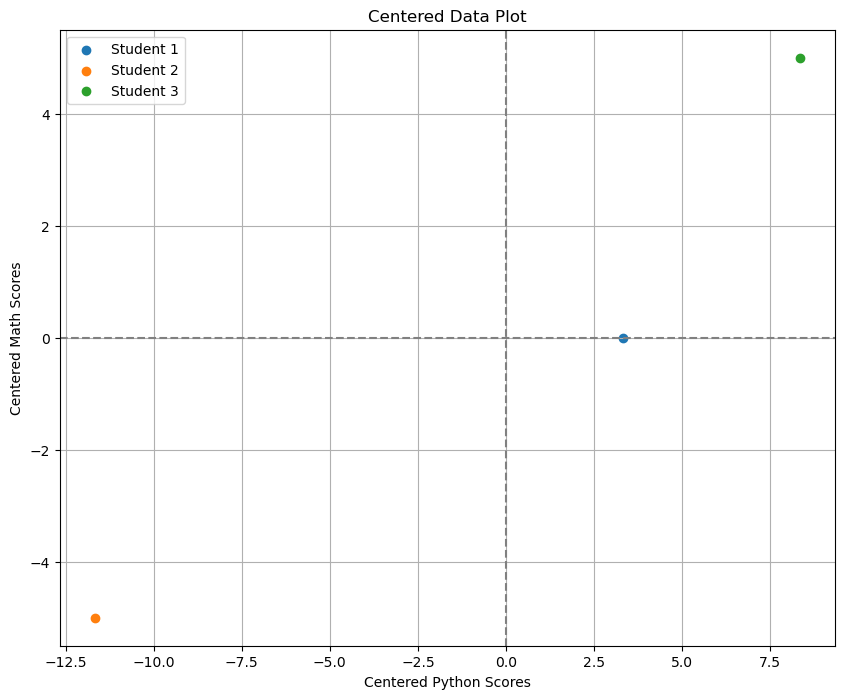

In [95]:
# Plotting the centered data
plt.figure(figsize=(10, 8))

for i, student in enumerate(df['Student']):
    plt.scatter(df_centered.loc[i, 'Python'], df_centered.loc[i, 'Math'], label=student, marker='o')

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.title('Centered Data Plot')
plt.xlabel('Centered Python Scores')
plt.ylabel('Centered Math Scores')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
df_centered

,Student,Python,Math
0,Student 1,3.333333,0.0
1,Student 2,-11.666667,-5.0
2,Student 3,8.333333,5.0


In [97]:
X_centered = df_centered[['Python', 'Math']].values
X_centered 

array([[  3.33333333,   0.        ],
       [-11.66666667,  -5.        ],
       [  8.33333333,   5.        ]])

In [98]:
cov_mat = np.cov(X_centered.T)
cov_mat

array([[108.33333333,  50.        ],
       [ 50.        ,  25.        ]])

In [99]:
Eval, Evec = eig(cov_mat)
print('Eigenvalues :')
print(Eval)
print('Eigenvectors :')
print(Evec)

Eigenvalues :
[131.75208063   1.5812527 ]
Eigenvectors :
[[ 0.90558942 -0.4241554 ]
 [ 0.4241554   0.90558942]]


In [100]:
# Projection
projected_data = Evec.T.dot(X_centered.T)
projected_data.T

array([[  3.0186314 ,  -1.41385132],
       [-12.6859869 ,   0.42053252],
       [  9.66735549,   0.9933188 ]])

<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
PCA with SKLEARN
</h1><center/>

In [58]:
df2 = np.array([[85,80],[70,75],[90,85]])

In [88]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(df2)

array([[  3.0186314 ,  -1.41385132],
       [-12.6859869 ,   0.42053252],
       [  9.66735549,   0.9933188 ]])

In [101]:
pca.explained_variance_ratio_

array([0.9881406, 0.0118594])

In [102]:
pcadf = pd.DataFrame(data = pca.fit_transform(df2), columns = ['PC1', 'PC2'])
pcadf

,PC1,PC2
0,3.018631,-1.413851
1,-12.685987,0.420533
2,9.667355,0.993319
